In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
PATH='/home/andre/PycharmProjects/onos_short_path/parser/'
TXT_FILES_PATH = PATH + 'txtFiles/'
ITG_PATH = '/home/andre/Загрузки/D-ITG-2.8.1-r1023-src/D-ITG-2.8.1-r1023/bin/'

### Отправка пакетов в несколько потоков 192.168.0.1 -> 192.168.0.6 

In [5]:
time = []
packet_loss_lists = [[] for x in range(1,6)]

with open(TXT_FILES_PATH + 't.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        time.append(split_line[0])

for i in range (1, 5+1):
    with open(TXT_FILES_PATH + f'pl{i}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            packet_loss_lists[i-1].append(split_line[0].replace(",", "."))

for i in range (1, 6):
    print(len(packet_loss_lists[i-1]))
    
df = pd.DataFrame({
    "time":time,
    "packetLoss3": packet_loss_lists[2],
    "packetLoss4": packet_loss_lists[3],
    "packetLoss5": packet_loss_lists[4],
})
df.time = df.time.apply(float)
df.packetLoss3 = df.packetLoss3.apply(float)
df.packetLoss4 = df.packetLoss4.apply(float)
df.packetLoss5 = df.packetLoss5.apply(float)
df

259
289
1005
1005
1005


,time,packetLoss3,packetLoss4,packetLoss5
0,0.00,12.0,4.0,13.0
1,0.01,11.0,17.0,16.0
2,0.02,12.0,17.0,12.0
3,0.03,4.0,5.0,16.0
4,0.04,0.0,8.0,15.0
...,...,...,...,...
1000,10.00,0.0,0.0,0.0
1001,10.01,0.0,0.0,0.0
1002,10.02,0.0,0.0,0.0
1003,10.03,0.0,0.0,0.0


#### Packet loss <= 0.5% при отправке пакетов одного устройства на другое в 5 потоков

<img src="assets/1-to-1.png" width="400" />

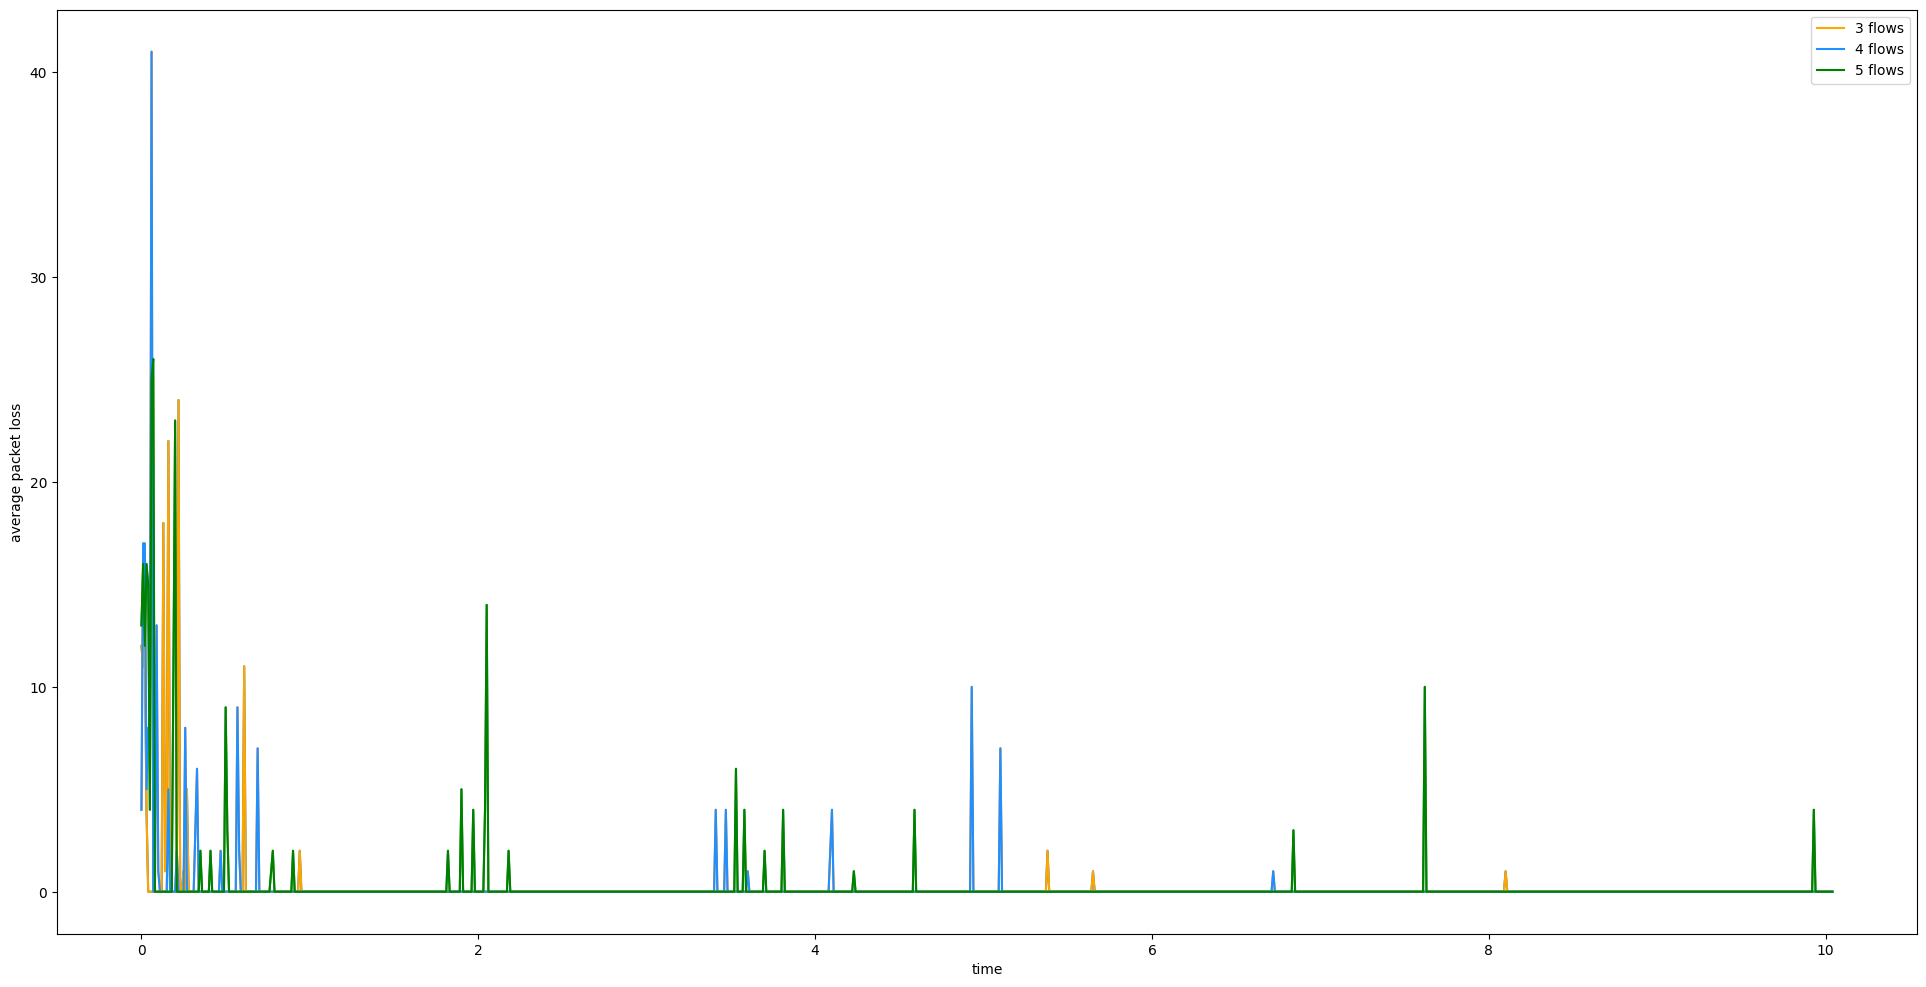

In [11]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = df['time']
y3 = df['packetLoss3']
y4 = df['packetLoss4']
y5 = df['packetLoss5']
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)

ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

ax.plot(x, y3, label = '3 flows', color='orange')
ax.plot(x, y4, label = '4 flows', color='dodgerblue')
ax.plot(x, y5, label = '5 flows', color='green')
ax.legend()

plt.show()

### Отправка пакетов размером 1000 byte с большим rate (10_000_000 pkts/s) в несколько потоков

<img src="assets/1-1_10m-1flow.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

##### Рост доли потерянных пакетов при увеличении количества потоков

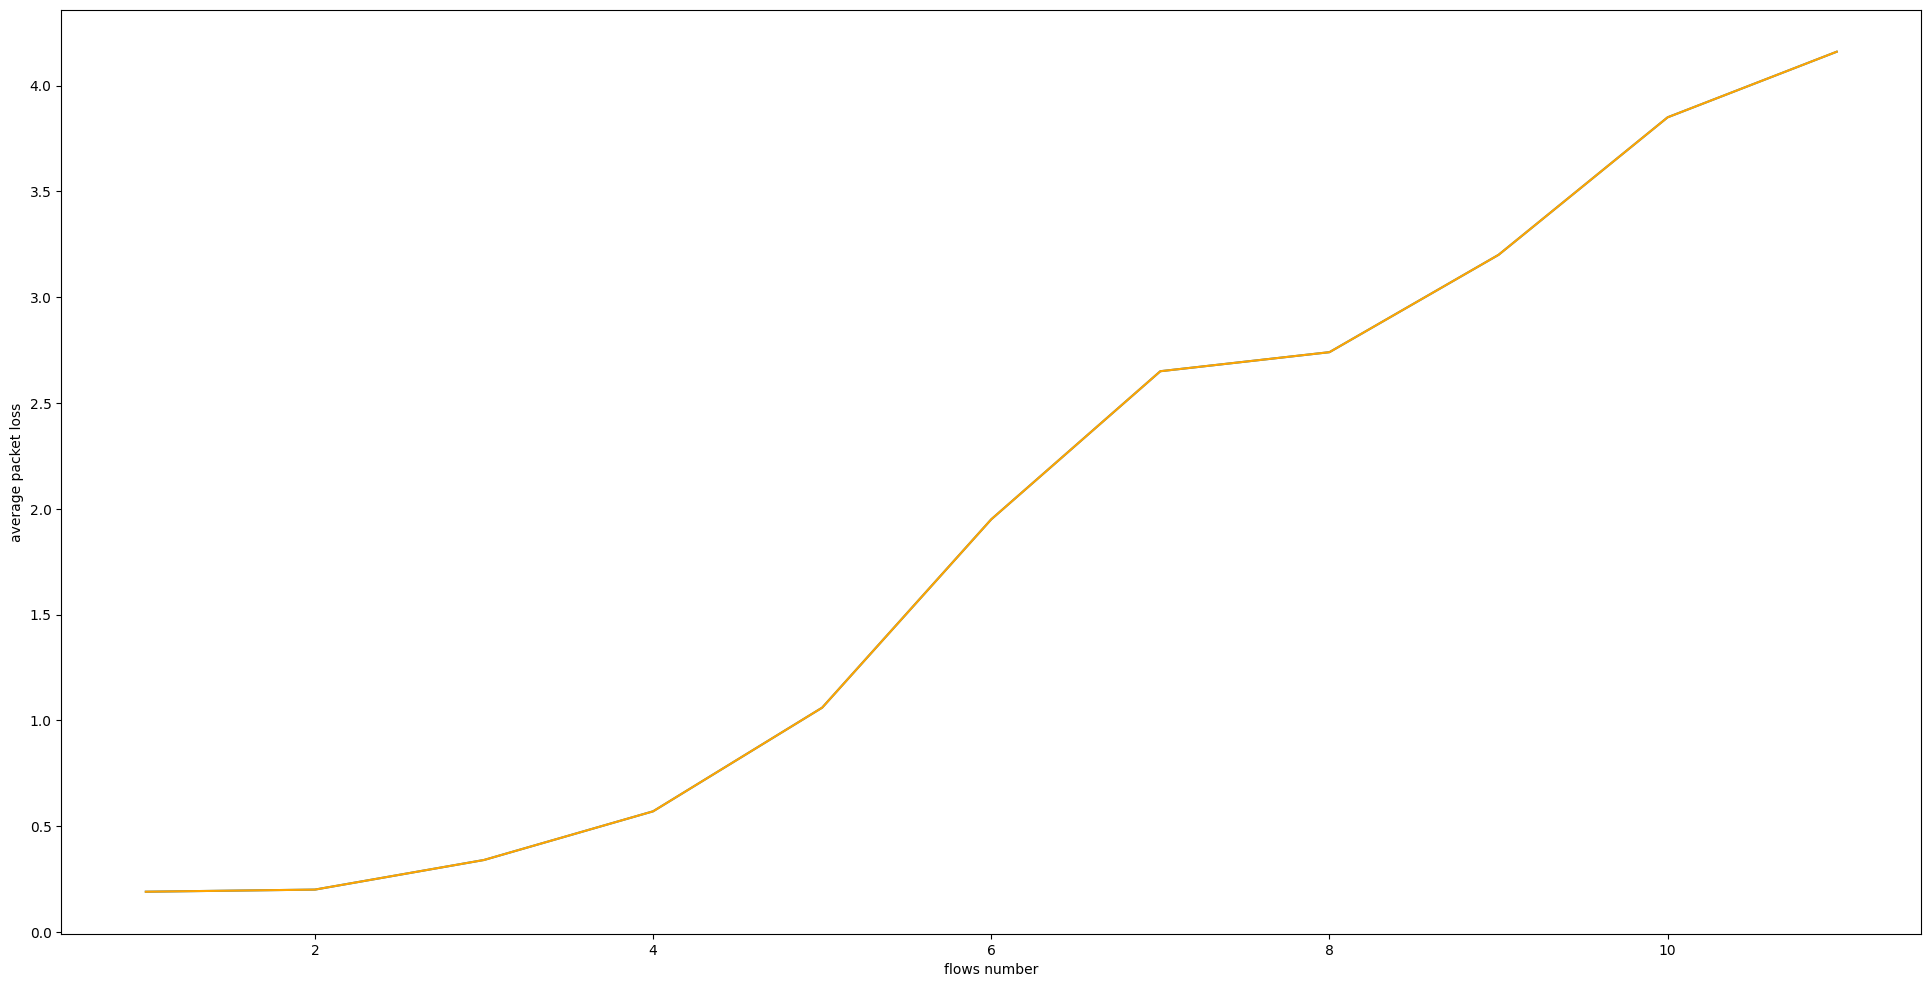

In [16]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = [1,2,3,4,5,6,7,8,9,10,11]
y = [0.19, 0.20, 0.34, 0.57, 1.06, 1.95, 2.65, 2.74, 3.20, 3.85, 4.16]
ax.plot(x, y)

ax.set_xlabel('flows number')
ax.set_ylabel('average packet loss')

ax.plot(x, y, color='orange')

plt.show()

#### Определение модели распределения?

### Отправка пакетов с 5 устройств на 1 (порт сохраняется)

#### -c 512 -C 1000 -t 10000

In [19]:
Time = []
with open(TXT_FILES_PATH + 'T.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        Time.append(split_line[0].replace(",", "."))

PL_lists = [[] for x in range(1,6)]
for i in range (2, 5+1):
    with open(TXT_FILES_PATH + f'PL{i}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            PL_lists[i-1].append(split_line[0].replace(",", "."))
    
df1 = pd.DataFrame({
    "time":Time,
    #"packetLoss1": PL_lists[0],
    "packetLoss2": PL_lists[1],
    "packetLoss3": PL_lists[2],
    "packetLoss4": PL_lists[3],
    "packetLoss5": PL_lists[4],
})
df1.time = df1.time.apply(float)
#df1.packetLoss1 = df1.packetLoss1.apply(float)
df1.packetLoss2 = df1.packetLoss2.apply(float)
df1.packetLoss3 = df1.packetLoss3.apply(float)
df1.packetLoss4 = df1.packetLoss4.apply(float)
df1.packetLoss5 = df1.packetLoss5.apply(float)
df1

,time,packetLoss2,packetLoss3,packetLoss4,packetLoss5
0,0.00,0.0,1.0,0.0,5.0
1,0.01,0.0,0.0,0.0,15.0
2,0.02,0.0,0.0,0.0,0.0
3,0.03,0.0,0.0,0.0,0.0
4,0.04,0.0,0.0,1.0,0.0
...,...,...,...,...,...
995,9.95,89.0,3.0,7.0,7.0
996,9.96,1.0,15.0,0.0,0.0
997,9.97,0.0,1.0,0.0,220.0
998,9.98,0.0,0.0,0.0,11.0


<img src="assets/2-to-1.png" width="600" />

<img src="assets/3-to-1.png" width="600" />

<img src="assets/4-to-1.png" width="600" />

<img src="assets/5-to-1.png" width="600" />

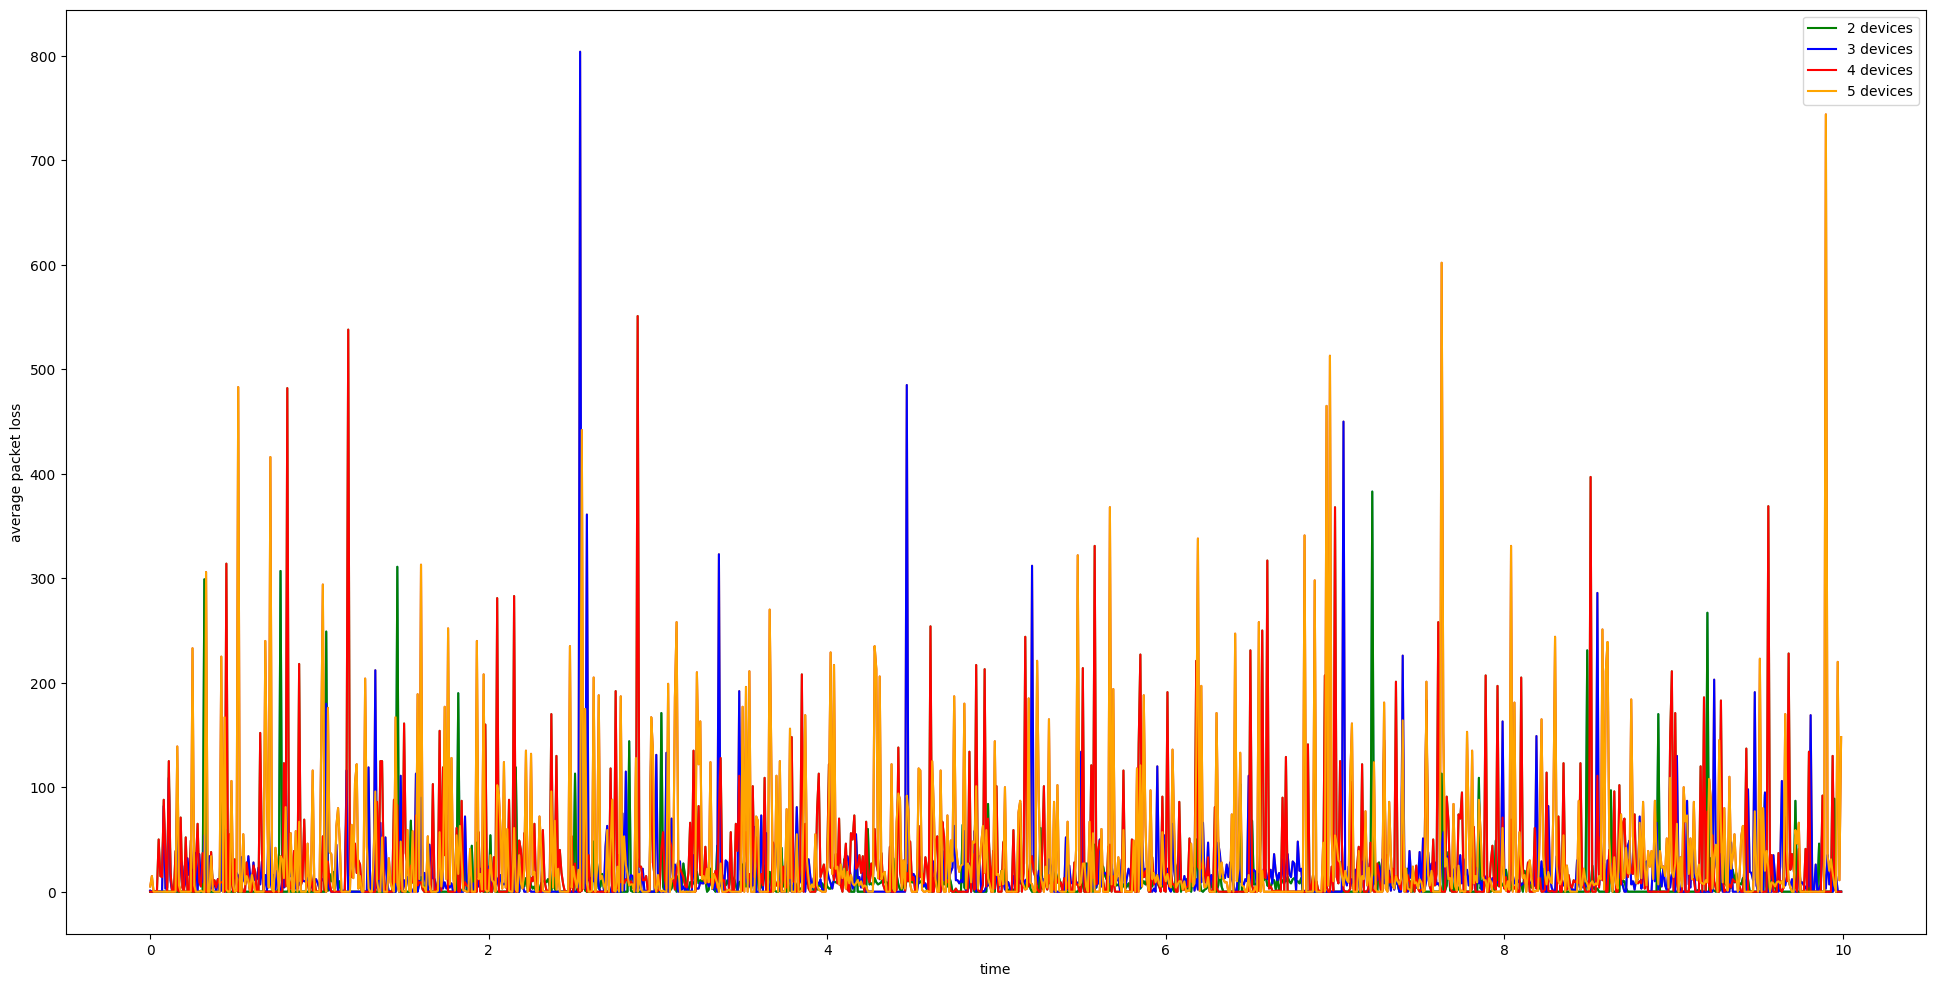

In [21]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = df1['time']
#y1 = df1['packetLoss1']
y2 = df1['packetLoss2']
y3 = df1['packetLoss3']
y4 = df1['packetLoss4']
y5 = df1['packetLoss5']
#ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)

ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

#ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y2, label = '2 devices', color='green')
ax.plot(x, y3, label = '3 devices', color='blue')
ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y5, label = '5 devices', color='orange')
ax.legend()

plt.show()

#### Причина многократного роста Packet loss при отправки пакетов с разных устройств?

## All-to-all case

In [170]:
# number of hosts in topology
nodes_num = 10
# push average packet loss to file every <PT> milliseconds
PT = 1

In [171]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -p {PT} packetloss{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


In [172]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
            if len(split_line) != nodes_num+1:
                i += 1
            else:
                recv_data[i].append(split_line[nodes_num].replace(",", "."))

print(len(time))
for i in recv_data:
    print(len(i))

100785
10039
10067
10061
10096
10070
10076
10102
10102
10087
10085


In [176]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 10039
[0.05, 0.09, 0.1, 0.14, 0.13, 0.14, 0.1, 0.8, 0.18, 0.13]
[0.09, 0.09, 0.08, 0.1, 0.1, 0.1, 0.1, 0.11, 0.08, 0.1]
Error: 9.9 %


,time,packetloss1,packetloss2,packetloss3,packetloss4,packetloss5,packetloss6,packetloss7,packetloss8,packetloss9,packetloss10
1,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.004,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10034,10.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10035,10.034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10036,10.035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10037,10.036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


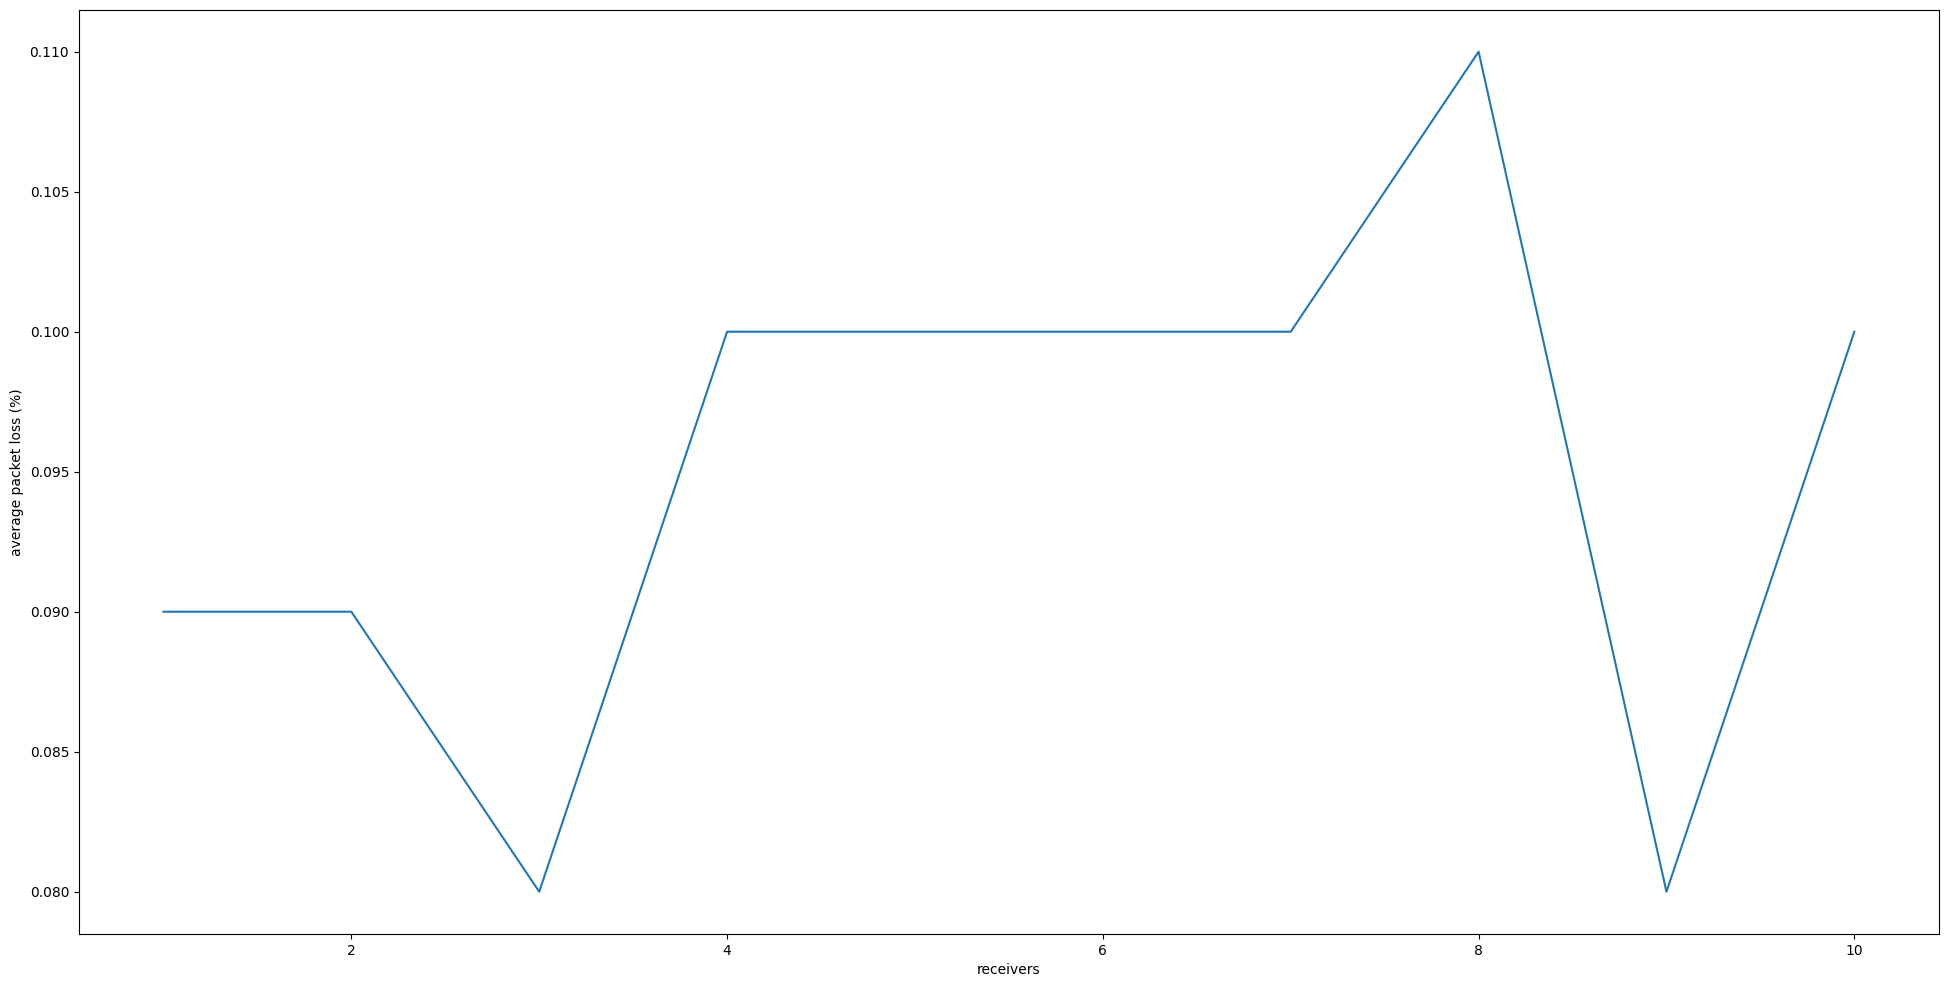

In [191]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot([x for x in range(1, nodes_num+1)], pl)

ax.set_xlabel('receivers')
ax.set_ylabel('average packet loss (%)')

plt.show()

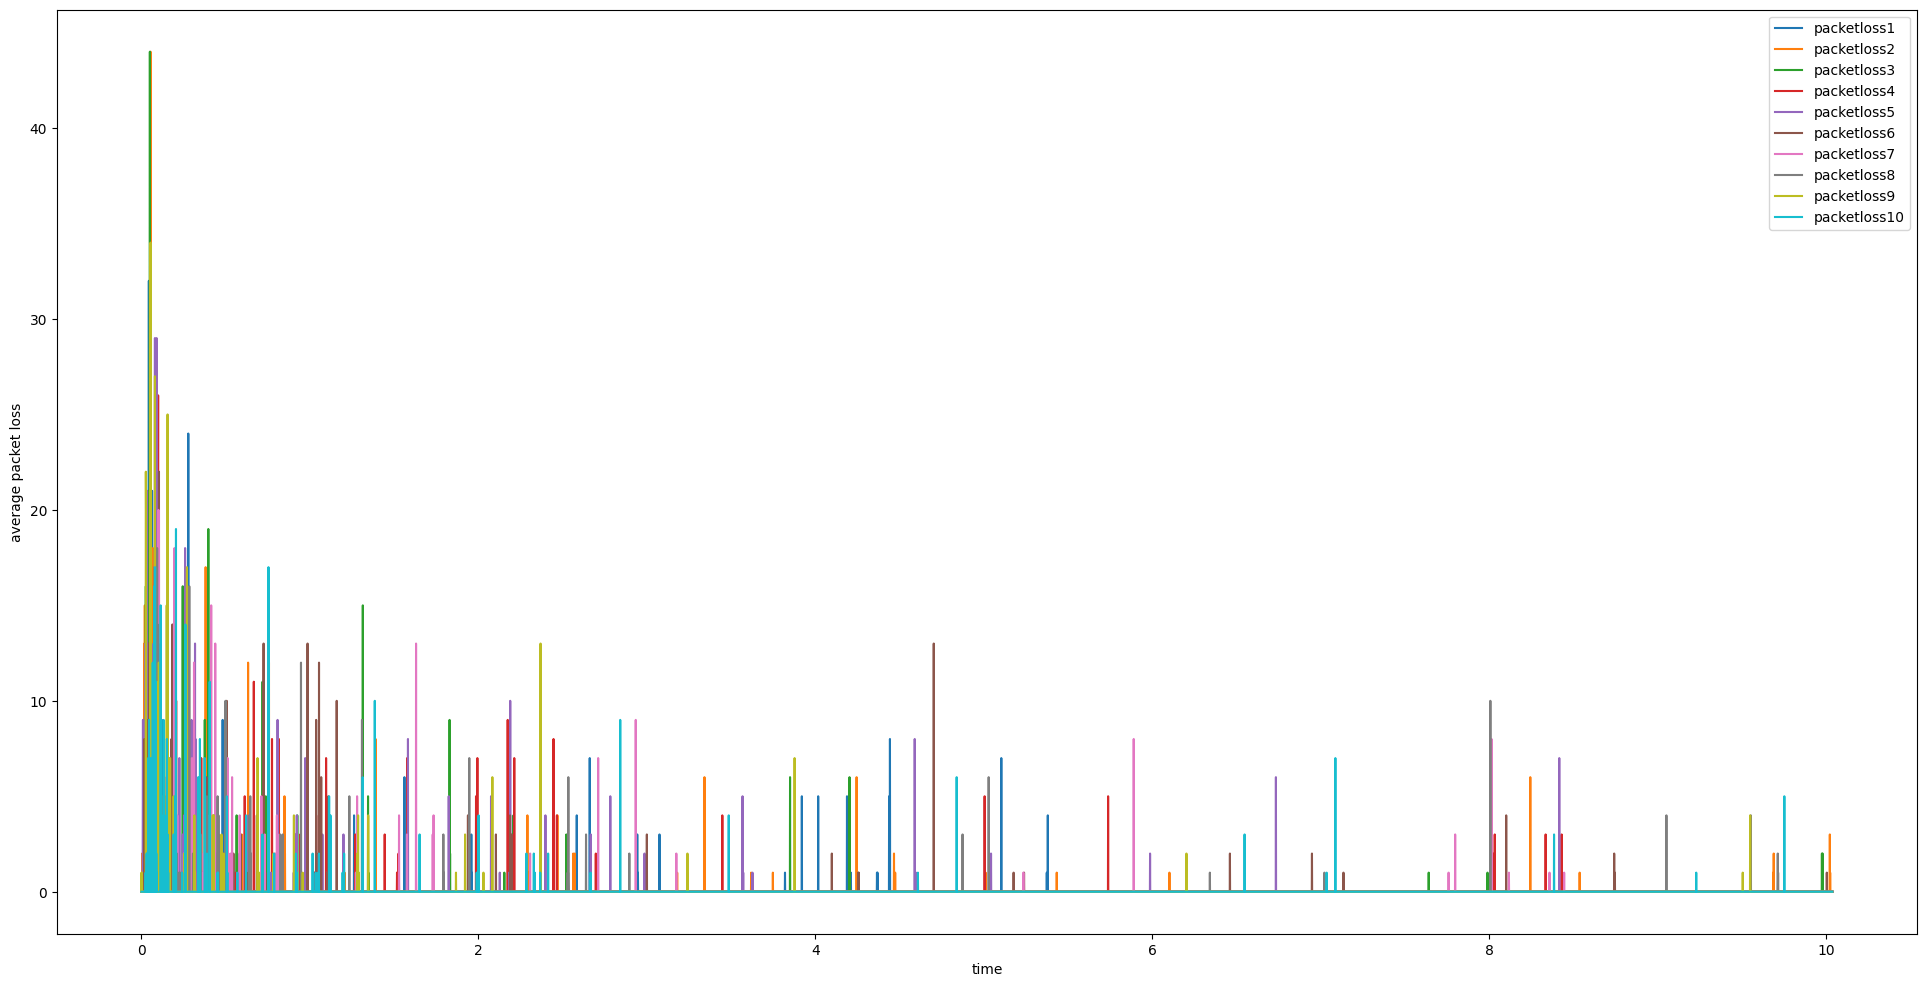

In [174]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

plt.show()

In [177]:
# evaluate error
etalon = [0.05,0.09,0.1,0.14,0.13,0.14,0.10,0.8,0.18,0.13]
print(etalon)
pl = []
for i in range(nodes_num):
    pl.append(round(len(pl_df[pl_df[f'packetloss{i+1}']>0.0]) / 85100 * 100, 2))

print(pl)
res = []
for i in range(len(pl)):
    res.append(abs(etalon[i]-pl[i]))
print(f'Error: {round(sum(x for x in res) / len(res) * 100,2)} %')

[0.05, 0.09, 0.1, 0.14, 0.13, 0.14, 0.1, 0.8, 0.18, 0.13]
[0.09, 0.09, 0.08, 0.1, 0.1, 0.1, 0.1, 0.11, 0.08, 0.1]
Error: 9.9 %


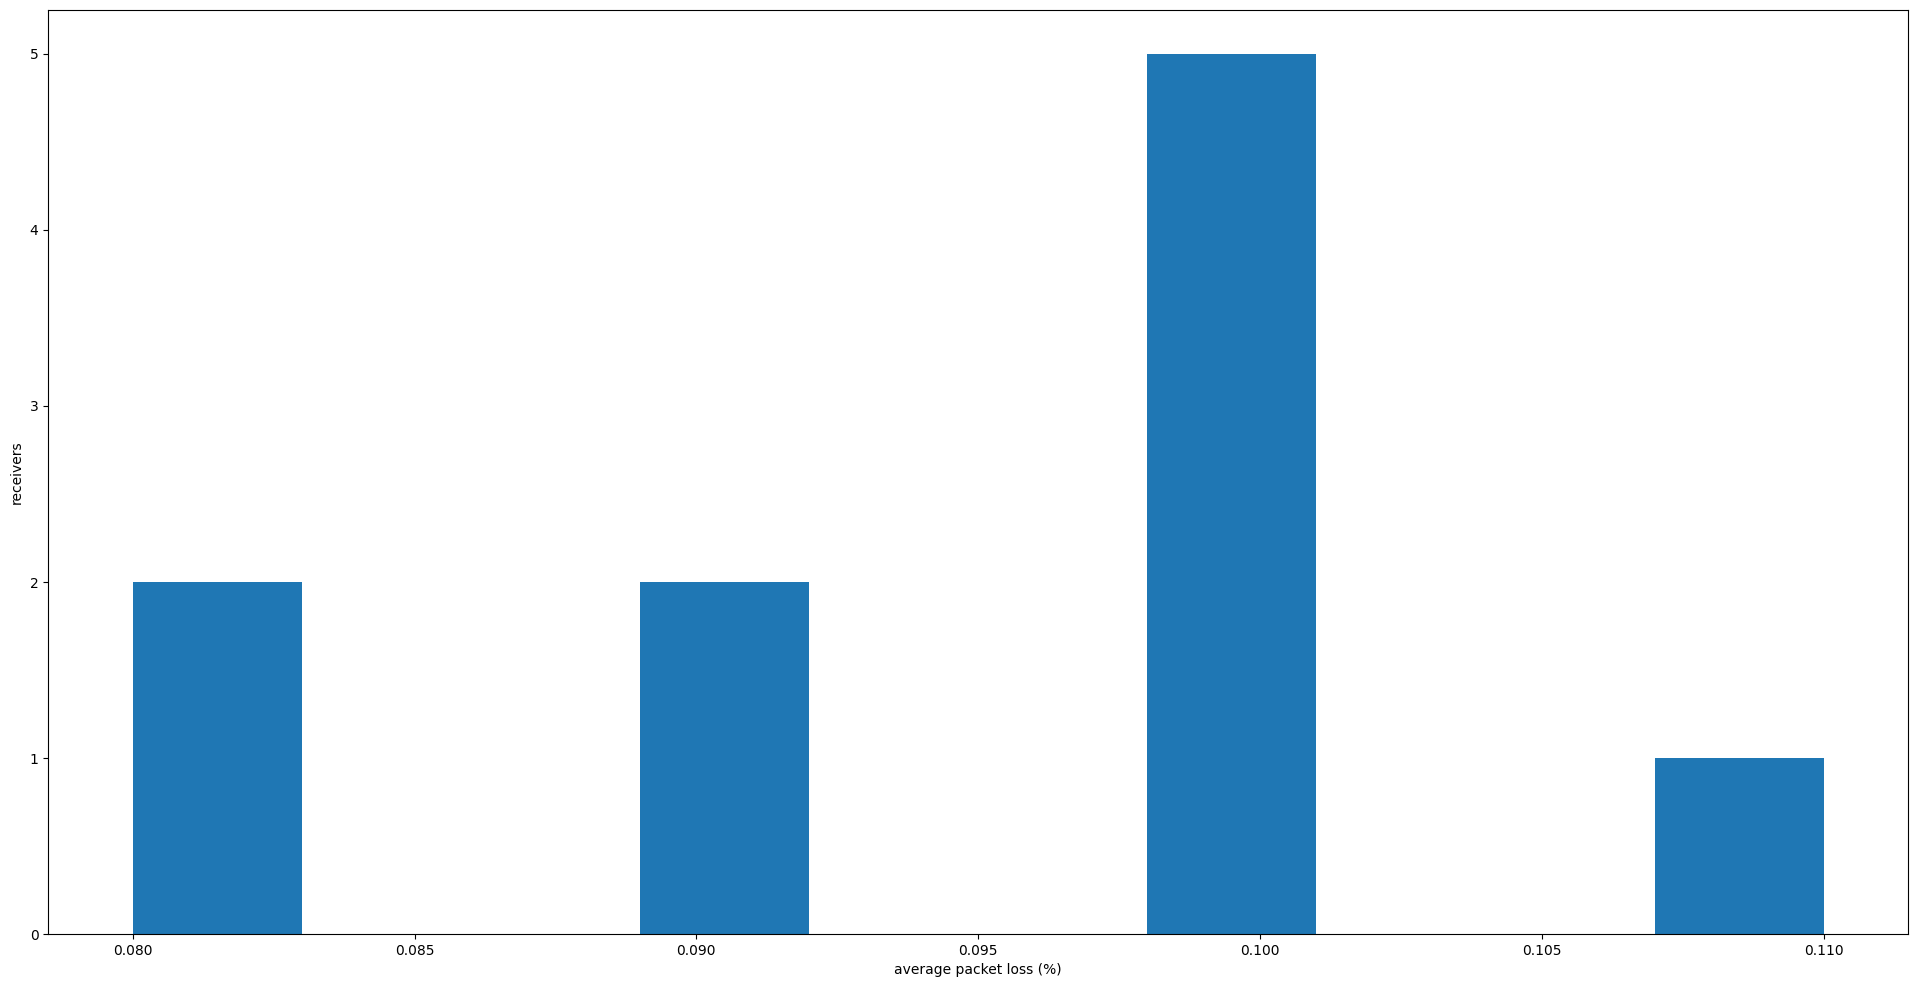

In [187]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()

## Custom case

In [1]:
# number of hosts in topology
nodes_num = 6
# push average packet loss to file every <PT> milliseconds
PT = 1

In [5]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -p {PT} packetloss{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport
ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport
ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport
ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport
ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport
ITGDec version 2.8.1 (r1023)
Compile-time options: bursty multiport


|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

In [6]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
            if len(split_line) != nodes_num+1:
                i += 1
            else:
                recv_data[i].append(split_line[nodes_num].replace(",", "."))

print(len(time))
for i in recv_data:
    print(len(i))

60046
0
0
0
0
0
0


In [7]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot([x for x in range(1, nodes_num+1)], pl)

ax.set_xlabel('receivers')
ax.set_ylabel('average packet loss (%)')

plt.show()

In [ ]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

plt.show()

In [ ]:
# evaluate error
etalon = [0.05,0.09,0.1,0.14,0.13,0.14,0.10,0.8,0.18,0.13]
print(etalon)
pl = []
for i in range(nodes_num):
    pl.append(round(len(pl_df[pl_df[f'packetloss{i+1}']>0.0]) / 85100 * 100, 2))

print(pl)
res = []
for i in range(len(pl)):
    res.append(abs(etalon[i]-pl[i]))
print(f'Error: {round(sum(x for x in res) / len(res) * 100,2)} %')

In [ ]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()